In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Optional: Set plot styles for better readability
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
file_path = r'C:\Users\hp\Desktop\Projects\KAIM\env\data\togo-dapaong_qc.csv'

df = pd.read_csv(file_path, parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [4]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [5]:
missing = df.isnull().sum()
print(missing)
#only missing comment

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
#clean data
df.fillna({"Comments": ""}, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [7]:
#remove anomalies
df = df[df['GHI'] > 0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 267553 entries, 343 to 525587
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      267553 non-null  datetime64[ns]
 1   GHI            267553 non-null  float64       
 2   DNI            267553 non-null  float64       
 3   DHI            267553 non-null  float64       
 4   ModA           267553 non-null  float64       
 5   ModB           267553 non-null  float64       
 6   Tamb           267553 non-null  float64       
 7   RH             267553 non-null  float64       
 8   WS             267553 non-null  float64       
 9   WSgust         267553 non-null  float64       
 10  WSstdev        267553 non-null  float64       
 11  WD             267553 non-null  float64       
 12  WDstdev        267553 non-null  float64       
 13  BP             267553 non-null  int64         
 14  Cleaning       267553 non-null  int64         
 15  Pre

In [8]:
df['z_GHI'] = zscore(df['GHI'])
outliers = df[df['z_GHI'].abs() > 3]
outliers

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,z_GHI
416899,2022-08-10 12:20:00,1413.0,764.6,645.2,1325.0,1308.0,30.1,69.8,4.7,6.2,1.2,224.0,14.5,977,0,0.0,49.2,52.8,,3.005427
416900,2022-08-10 12:21:00,1419.0,751.1,659.4,1327.0,1311.0,30.1,70.0,4.4,5.8,0.6,222.8,9.8,977,0,0.0,50.9,54.4,,3.024255
461522,2022-09-10 12:03:00,1412.0,836.2,583.8,1363.0,1347.0,28.8,75.4,4.0,5.2,0.9,209.5,15.4,979,0,0.0,49.2,53.5,,3.002289
461523,2022-09-10 12:04:00,1424.0,830.0,600.1,1374.0,1358.0,28.9,74.6,4.1,5.4,1.0,202.0,12.0,979,0,0.0,50.6,55.0,,3.039944
476015,2022-09-20 13:36:00,1417.0,861.8,639.6,1380.0,1367.0,27.2,82.1,4.2,5.2,0.6,185.9,15.0,975,0,0.0,43.3,44.6,,3.017979


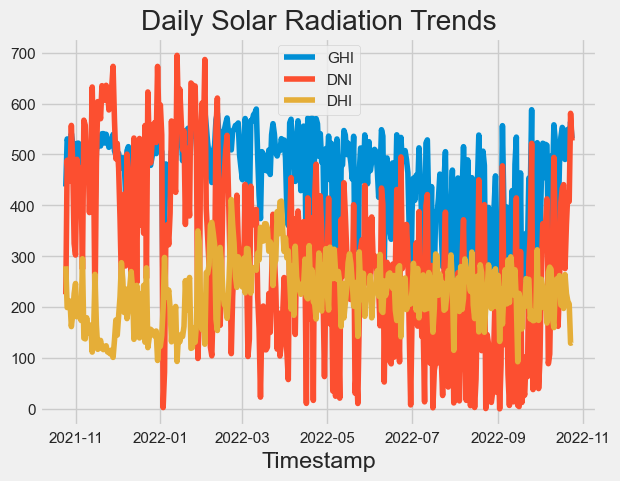

In [9]:
df.groupby(df['Timestamp'].dt.date)[['GHI', 'DNI', 'DHI']].mean().plot()
plt.title("Daily Solar Radiation Trends")
plt.show()

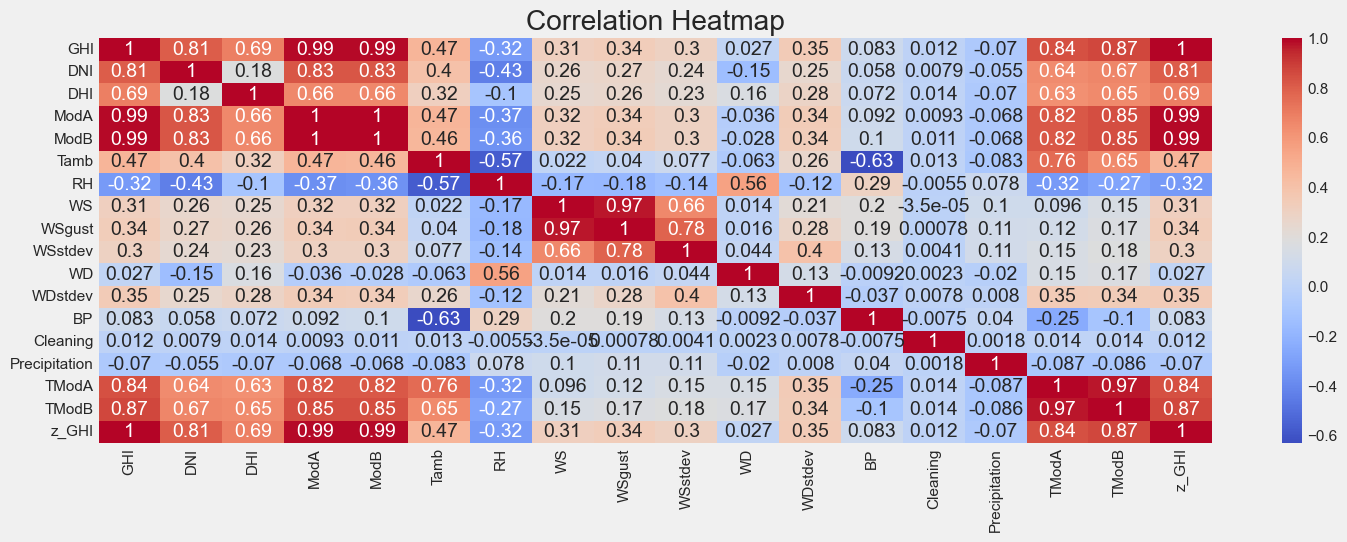

In [10]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

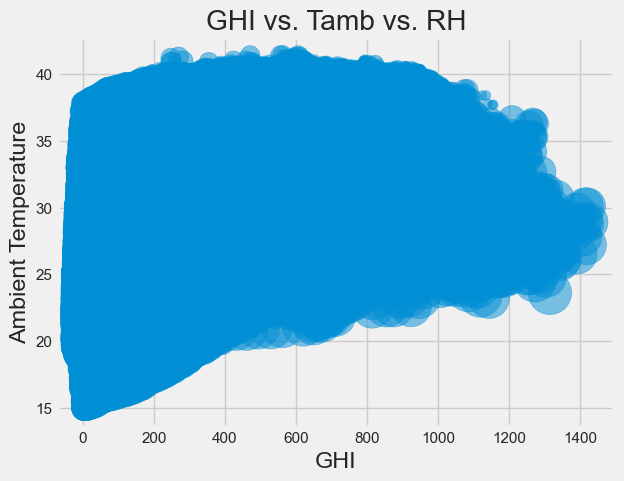

In [11]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Ambient Temperature")
plt.title("GHI vs. Tamb vs. RH")
plt.show()
